# Adaptive Moment Estimation (Adam) for Deep Long Short Term Networks

## Import Dependencies

In [1]:
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import pandas as pd
import yaml

import json

## General Setup

In [2]:
with open('config-jpy.yaml', 'rb') as file:
    config = yaml.safe_load(file)

In [3]:
config['DATA']

{'TRAINING': 0.8,
 'TESTING': 0.2,
 'START_DATE': datetime.date(2014, 10, 20),
 'END_DATE': datetime.date(2022, 10, 20)}

## Data Collection

- Crawling historical data dari https://ofx.com
- Visualisasi data yang telah didapatkan

In [4]:
# collect data
from utils.data_generator import ofx_dataset
from datetime import datetime
from time import time

In [5]:
start_date= config["DATA"]["START_DATE"]
end_date = config["DATA"]["END_DATE"]

In [6]:
start_date = int( datetime.combine(start_date, datetime.min.time()).timestamp() ) * 1000
end_date   = int( datetime.combine(end_date, datetime.min.time()).timestamp() ) * 1000

In [9]:
datasets = ofx_dataset(start_date, end_date, scc="JPY", bcc="IDR")

200


In [10]:
datasets['timestamps'] = pd.to_datetime(datasets['timestamps'], unit='s')
datasets.set_index('timestamps', inplace=True)
datasets.head()

,values
timestamps,
2014-10-20,113.318052
2014-10-21,112.028070
2014-10-22,112.370612
2014-10-23,112.046542
2014-10-24,111.369724


### Function visualisasi data

In [16]:
def linechart(data: pd.DataFrame):
    plt.figure(figsize=(18, 6))
    plt.plot(data.index, datasets.values)
    plt.xlabel("Histories")
    plt.ylabel("Values")
    plt.title("Historical Data")
    plt.show()

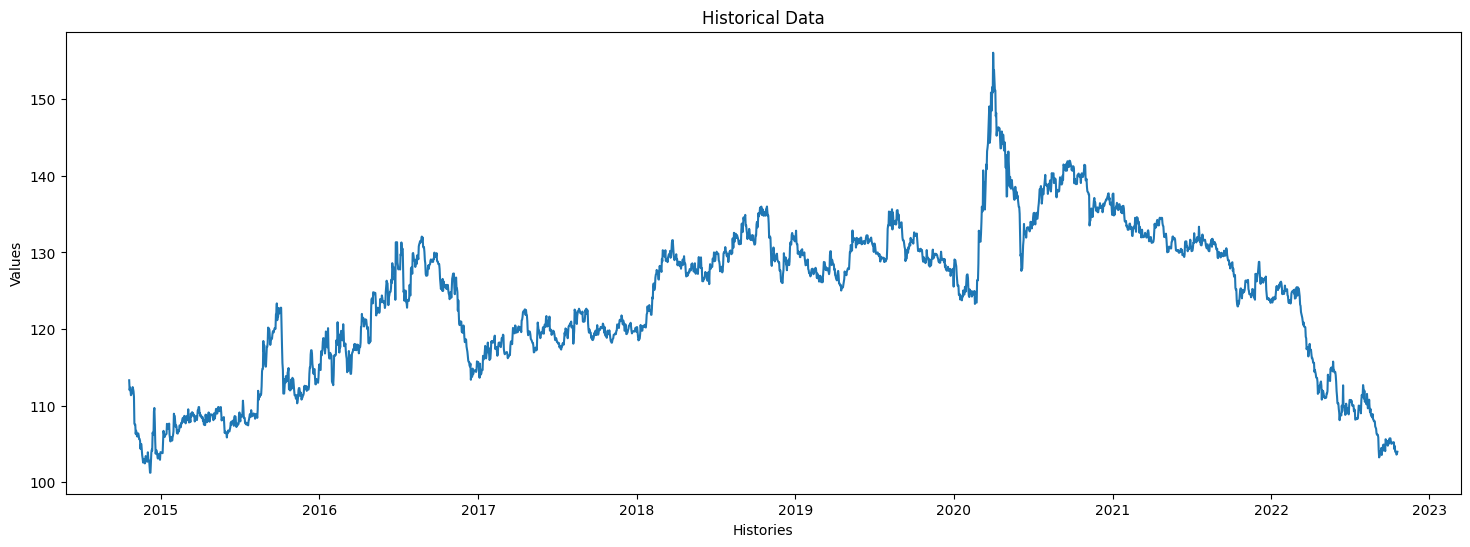

In [17]:
linechart(datasets)

## Data Spliting
- Split data yang telah didapatkan, menjadi 80% training dan 20% testing
- Visualisasi data yang telah dibagi

In [18]:
# proses split data
train_size = round(len(datasets) * .8)
train_df = datasets[:train_size]
test_df = datasets[train_size:]

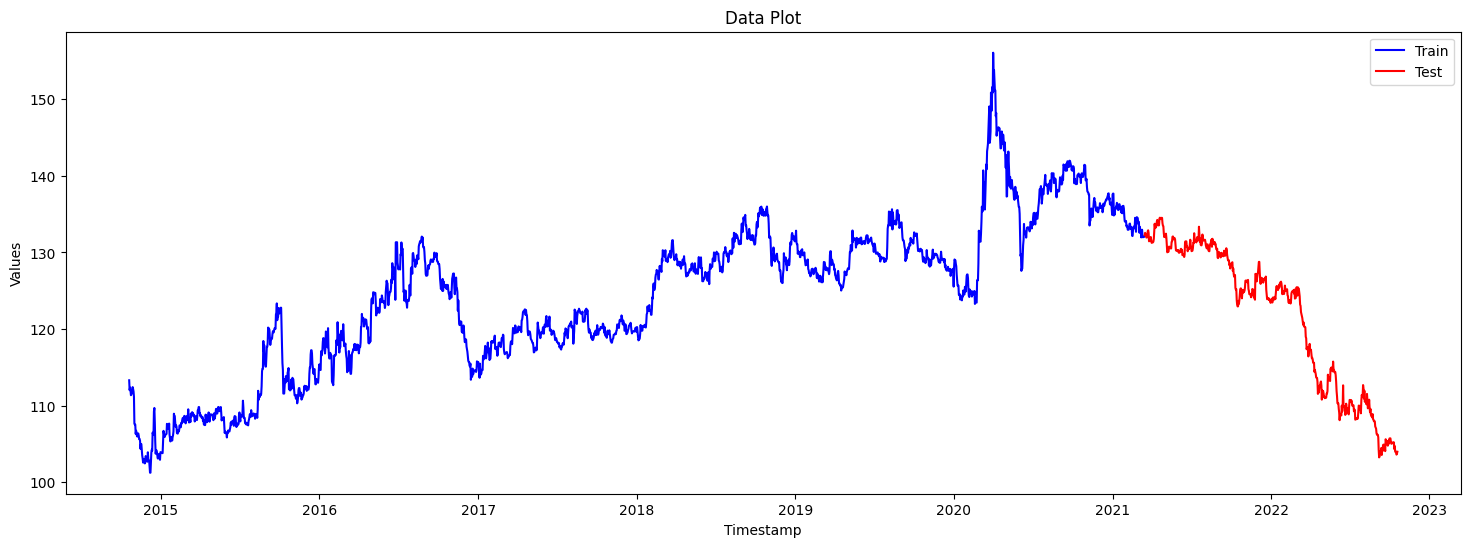

In [19]:
# proses visualisasi data
plt.figure(figsize=(18, 6))
plt.plot(train_df.index, train_df['values'], color='blue', label='Train')
plt.plot(test_df.index, test_df['values'], color='red', label='Test')

# Menambahkan label dan judul plot
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Data Plot')
plt.legend()

# Menampilkan plot
plt.show()

## Normalisasi Data
- Normalisasi data ke dalam scala -1 .. 1
- Data overview

In [13]:
import numpy as np

class MinMaxScaler:

    def __init__(self, min_val=-1,  max_val=1):
        self.min_val = min_val
        self.max_val = max_val
        self.min_data = None
        self.max_data = None

    def fit(self, data):
        self.min_data = min(data)
        self.max_data = max(data)

    def transform(self, data):
        scaled_data = (data - self.min_data) / (self.max_data - self.min_data)
        scaled_data = scaled_data * (self.max_val - self.min_val) + self.min_val
        return scaled_data

    def inverse_transform(self, scaled_data):
        data = ( scaled_data - self.min_val ) / ( self.max_val - self.min_val )
        data = data * ( self.max_data - self.min_data ) + self.min_data
        return data

In [14]:
# scaling datasets
train_scaler = MinMaxScaler(min_val=-1, max_val=1)
test_scaler = MinMaxScaler(min_val=-1, max_val=1)

train_scaler.fit(train_df['values'])
test_scaler.fit(test_df['values'])

train_df['normalized_values'] = train_scaler.transform(train_df['values'])
test_df['normalized_values'] = test_scaler.transform(test_df['values'])

/var/folders/zz/htmnld_148b1dbm4wj_hyrq80000gn/T/ipykernel_68787/1385162177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['normalized_values'] = train_scaler.transform(train_df['values'])
/var/folders/zz/htmnld_148b1dbm4wj_hyrq80000gn/T/ipykernel_68787/1385162177.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['normalized_values'] = test_scaler.transform(test_df['values'])


## Sliding Window

In [15]:
def sliding_window(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[ i : i+window_size ])
        y.append(data[ i + window_size ])
    np.array(X), np.array(y)
    np.reshape()

In [16]:
X_train, y_train = sliding_window(data=train_df.normalized_values, window_size=7)

In [19]:
X_train.shape, y_train.shape

((2310, 7), (2310,))